In [49]:
# --- Add this as the first code cell in your notebook ---

# Install required packages
!pip install --upgrade pip
!pip install pandas numpy scikit-learn matplotlib pillow requests tensorflow keras

# For plotting model architecture
!pip install pydot graphviz

# For displaying images in Jupyter
!apt-get install -y graphviz > /dev/null 2>&1 || echo "apt-get not available"

apt-get not available
apt-get not available
apt-get not available


# Satellite Image Classification

![](https://cff2.earth.com/uploads/2019/08/09193739/satellite-67718_1280-960x640.jpg)

[Image Source](https://www.earth.com/earthpedia-articles/how-many-satellites-in-space-do-we-know-about/)

The "Satellite Image Classification" dataset on Kaggle is a collection of satellite images labeled with classes such as "Cloudy", "Desert", "Green_Area", and "Water". The data is made up of satellite images of size 256x256, and can be used for computer vision tasks such as image classification.

# Satellite Image Classification Model

---

# GPU Being Used:

In [50]:
!nvidia-smi

Tue Sep  9 22:24:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.163.01             Driver Version: 550.163.01     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1050 Ti     Off |   00000000:01:00.0 Off |                  N/A |
| N/A   51C    P8             N/A / ERR!  |       7MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Data Pre-processing:

In [51]:
import pandas as pd
import os

# Create an empty dataframe
data = pd.DataFrame(columns=['image_path', 'label'])

# Define the labels/classes
labels = {'data/cloudy' : 'Cloudy',
          'data/desert' : 'Desert',
          'data/green_area' : 'Green_Area',
          'data/water' : 'Water',
           }

In [52]:
# Collect rows in a list instead of using append
rows = []
for folder in labels:
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        label = labels[folder]
        rows.append({'image_path': image_path, 'label': label})

# Create the DataFrame once at the end
data = pd.DataFrame(rows)

In [53]:
# Save the data to a CSV file
data.to_csv('image_dataset.csv', index=False)

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [55]:
# Load the dataset
df = pd.read_csv("image_dataset.csv")

In [56]:
df

,image_path,label
0,data/cloudy/train_16253.jpg,Cloudy
1,data/cloudy/train_11218.jpg,Cloudy
2,data/cloudy/train_29733.jpg,Cloudy
3,data/cloudy/train_11844.jpg,Cloudy
4,data/cloudy/train_30902.jpg,Cloudy
...,...,...
5626,data/water/SeaLake_456.jpg,Water
5627,data/water/SeaLake_779.jpg,Water
5628,data/water/SeaLake_68.jpg,Water
5629,data/water/SeaLake_1390.jpg,Water


In [57]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [58]:
# Pre-process the data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rotation_range=45,
                                   vertical_flip=True,
                                   fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col="image_path",
                                                    y_col="label",
                                                    target_size=(255, 255),
                                                    batch_size=32,
                                                    class_mode="categorical")

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  x_col="image_path",
                                                  y_col="label",
                                                  target_size=(255, 255),
                                                  batch_size=32,
                                                  class_mode="categorical")


Found 4504 validated image filenames belonging to 4 classes.
Found 1127 validated image filenames belonging to 4 classes.
Found 1127 validated image filenames belonging to 4 classes.
Found 1127 validated image filenames belonging to 4 classes.


# Deep Learning Model

In [59]:
# Build a deep learning model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(255, 255, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

/home/zackweb/Desktop/satellite-image-classification/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-09 22:24:36.193075: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 55115776 exceeds 10% of free system memory.
2025-09-09 22:24:36.226783: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 55115776 exceeds 10% of free system memory.


In [60]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
history = model.fit(train_generator, epochs=5, validation_data=test_generator)

/home/zackweb/Desktop/satellite-image-classification/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 601s 4s/step - accuracy: 0.6223 - loss: 0.6977 - val_accuracy: 0.7134 - val_loss: 0.5498
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 601s 4s/step - accuracy: 0.6223 - loss: 0.6977 - val_accuracy: 0.7134 - val_loss: 0.5498
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 610s 4s/step - accuracy: 0.7751 - loss: 0.4956 - val_accuracy: 0.6602 - val_loss: 0.5833
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 610s 4s/step - accuracy: 0.7751 - loss: 0.4956 - val_accuracy: 0.6602 - val_loss: 0.5833
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 517s 4s/step - accuracy: 0.8250 - loss: 0.4363 - val_accuracy: 0.8767 - val_loss: 0.3220
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 517s 4s/step - accuracy: 0.8250 - loss: 0.4363 - val_accuracy: 0.8767 - val_loss: 0.3220
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 447s 3s/step - accuracy: 0.8528 - loss: 0.3601 - val_accuracy: 0.8776 - val_loss: 0.3070
Epoch 5/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 447s 3s/step - accuracy: 0.8528 - loss: 0.3601 - val_accuracy: 0.

In [72]:
num_samples = test_df.shape[0]
num_samples

1127

In [73]:
score = model.evaluate(test_generator,
                       steps=num_samples//32+1,
                       )

36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 578ms/step - accuracy: 0.8882 - loss: 0.2895
36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 578ms/step - accuracy: 0.8882 - loss: 0.2895


In [74]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 253, 253, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 251, 251, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 125, 125, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 123, 123, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    13,779,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,882,086 (52.96 MB)

 Trainable params: 13,882,084 (52.96 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [75]:
try:
    from tensorflow.keras.utils import plot_model
    from PIL import Image
    import os
    
    # Try to create model plot
    plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
    
    # Check if file was created successfully
    if os.path.exists('cnn_model.png'):
        display(Image.open('cnn_model.png'))
    else:
        print("Could not create model plot. Showing model summary instead:")
        model.summary()
        
except Exception as e:
    print(f"Error creating model plot: {e}")
    print("Showing model summary instead:")
    model.summary()

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
Could not create model plot. Showing model summary instead:
Could not create model plot. Showing model summary instead:
Could not create model plot. Showing model summary instead:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 253, 253, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 251, 251, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 125, 125, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 123, 123, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 107648)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    13,779,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,882,086 (52.96 MB)

 Trainable params: 13,882,084 (52.96 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# Loss & Accuracy Visualizations

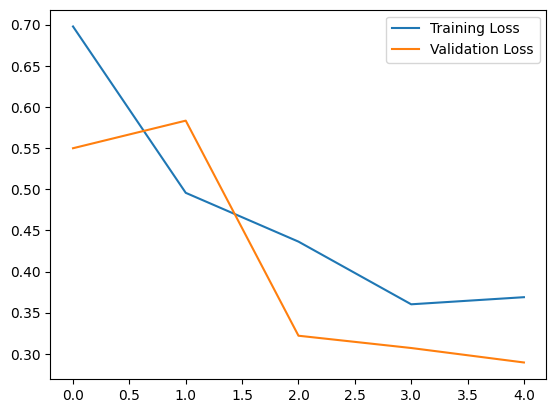

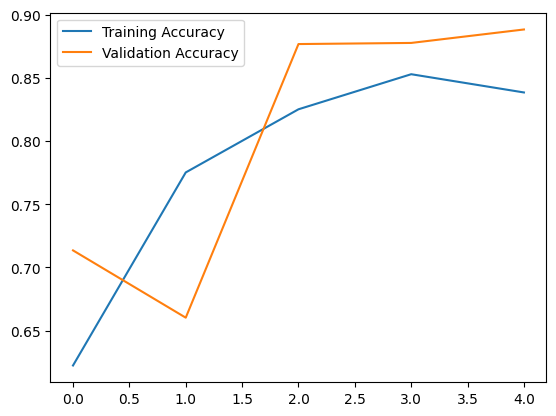

<Figure size 640x480 with 0 Axes>

In [76]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Saving Our Model

In [77]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('Model.h5')

In [78]:
# Load the model
model = load_model("Model.h5")

In [79]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the class names
class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']

In [80]:
# Load an image from the test set
img = load_img("data/green_area/Forest_1768.jpg", target_size=(255, 255))

In [81]:
# Convert the image to an array
img_array = img_to_array(img)
img_array

array([[[33., 60., 69.],
        [33., 60., 69.],
        [33., 60., 69.],
        ...,
        [38., 65., 72.],
        [38., 65., 72.],
        [38., 65., 72.]],

       [[33., 60., 69.],
        [33., 60., 69.],
        [33., 60., 69.],
        ...,
        [38., 65., 72.],
        [38., 65., 72.],
        [38., 65., 72.]],

       [[33., 60., 69.],
        [33., 60., 69.],
        [33., 60., 69.],
        ...,
        [38., 65., 72.],
        [38., 65., 72.],
        [38., 65., 72.]],

       ...,

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]],

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]],

       [[33., 57., 67.],
        [33., 57., 67.],
        [33., 57., 67.],
        ...,
        [31., 58., 65.],
        [31., 58., 65.],
        [31., 58., 65.]]

In [82]:
img_array.shape

(255, 255, 3)

In [83]:
# Normalize the image pixel values to the range [0, 1]
img_array = img_array / 255.0
img_array

array([[[0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        ...,
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295]],

       [[0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        ...,
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295]],

       [[0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        [0.12941177, 0.23529412, 0.27058825],
        ...,
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295],
        [0.14901961, 0.25490198, 0.28235295]],

       ...,

       [[0.12941177, 0.22352941, 0.2627451 ],
        [0.12941177, 0.22352941, 0.2627451 ],
        [0.12941177, 0

In [84]:
import numpy as np
img_array = np.reshape(img_array, (1, 255, 255, 3))

# Using Our Model For Predictions

In [85]:
# Get the model predictions
predictions = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


In [86]:
# Get the class index with the highest predicted probability
class_index = np.argmax(predictions[0])

# Get the predicted class label
predicted_label = class_names[class_index]

print("The image is predicted to be '{}'.".format(predicted_label))

The image is predicted to be 'Green_Area'.


In [87]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [88]:
predictions = model.predict(test_generator)

36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 586ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 586ms/step
36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 586ms/step


In [89]:
predictions

array([[3.6681024e-07, 6.4831013e-13, 5.9615780e-04, 9.9940336e-01],
       [2.3993337e-07, 5.3478923e-13, 7.5757504e-04, 9.9924219e-01],
       [5.3614175e-09, 9.3788898e-16, 1.0919846e-04, 9.9989074e-01],
       ...,
       [4.1194580e-05, 2.3364250e-07, 9.3711913e-01, 6.2839404e-02],
       [1.0778191e-02, 9.8922181e-01, 9.5647199e-13, 7.6455693e-13],
       [9.8960203e-01, 1.0389377e-02, 9.7158352e-09, 8.6308064e-06]],
      shape=(1127, 4), dtype=float32)

In [90]:
actual_labels = test_generator.classes

In [91]:
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

array([3, 3, 3, ..., 2, 1, 0], shape=(1127,))

In [92]:
cm = confusion_matrix(actual_labels, predicted_labels)

In [93]:
print(cm)

[[104  54  82  88]
 [ 69  43  56  59]
 [ 88  52  57  87]
 [ 97  47  67  77]]


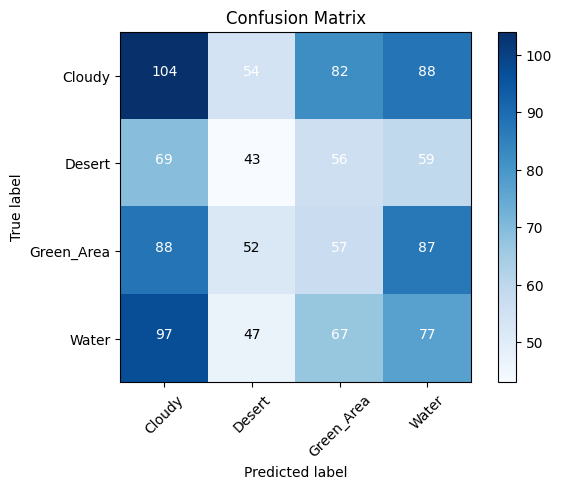

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Confusion matrix


# Plot the confusion matrix as an image
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Add the class labels to the plot
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add values to the plot
threshold = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black")

plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# Advanced Predictions From URLs

In [95]:
from io import BytesIO
import requests
from tensorflow.keras.preprocessing import image
import numpy as np
import tempfile

# Define the class names
class_names = ['Cloudy', 'Desert', 'Green_Area', 'Water']

url_list = ['https://eoimages.gsfc.nasa.gov/images/imagerecords/92000/92263/goldstone_oli_2018124_lrg.jpg',
            'https://images.theconversation.com/files/258323/original/file-20190211-174861-jya1so.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=1356&h=668&fit=crop',
            'https://img.freepik.com/free-photo/amazing-beautiful-sky-with-clouds_58702-1657.jpg?w=2000',
            'https://i.natgeofe.com/n/54c007c9-50e5-4cf5-83dc-978a35a4373a/68576_16x9.jpg',
           ]


for url in url_list:
    response = requests.get(url)
    with tempfile.NamedTemporaryFile(mode='wb') as f:
        f.write(response.content)
        f.seek(0)
        img = image.load_img(f.name, target_size=(255, 255))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)

        classes = model.predict(img, batch_size=10)
        class_index = np.argmax(classes[0])
        predicted_label = class_names[class_index]
        print(url + "The image is predicted to be '{}'.".format(predicted_label))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
https://eoimages.gsfc.nasa.gov/images/imagerecords/92000/92263/goldstone_oli_2018124_lrg.jpgThe image is predicted to be 'Desert'.
https://eoimages.gsfc.nasa.gov/images/imagerecords/92000/92263/goldstone_oli_2018124_lrg.jpgThe image is predicted to be 'Desert'.
https://eoimages.gsfc.nasa.gov/images/imagerecords/92000/92263/goldstone_oli_2018124_lrg.jpgThe image is predicted to be 'Desert'.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
https://images.theconversation.com/files/258323/original/file-20190211-174861-jya1so.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=1356&h=668&fit=cropThe image is predicted to be 'Water'.
https://images.theconversation.com/files/258323/original/file-20190211-174861-jya1so.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=1356&h=668&fit=cropThe image is predicted to be 'Water'.
https://images.thec